In [1]:
import pandas as pd
import matplotlib as plt
from catboost import CatBoostRegressor
import numpy as np

In [2]:
train=pd.read_csv('/Users/maksimvejnbender/Downloads/raif/raif_train.csv')
test=pd.read_csv('/Users/maksimvejnbender/Downloads/raif/test.csv')

/Users/maksimvejnbender/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
train['split']=1
test['split']=0

<AxesSubplot:xlabel='lng', ylabel='lat'>

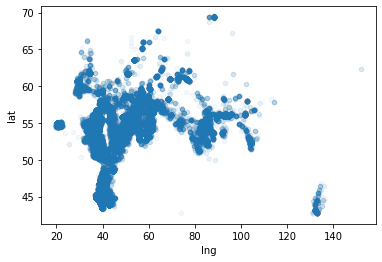

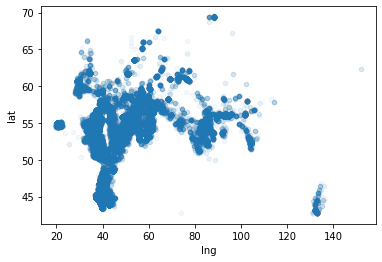

In [4]:
train.plot(kind="scatter", x="lng", y="lat", alpha=0.05)
train.plot(kind="scatter", x="lng", y="lat", alpha=0.05)

In [5]:
df=pd.concat([train, test]).query('price_type == 1')

In [6]:
df

,city,floor,id,lat,lng,osm_amenity_points_in_0.001,osm_amenity_points_in_0.005,osm_amenity_points_in_0.0075,osm_amenity_points_in_0.01,osm_building_points_in_0.001,...,reform_mean_floor_count_500,reform_mean_year_building_1000,reform_mean_year_building_500,region,total_square,street,date,realty_type,price_type,split
275299,Красноярск,NaN,COL_62,56.063615,92.958428,0,7,14,26,0,...,7.612903,1976.684211,1980.483871,Красноярский край,106.351104,S5845,2020-01-05,110,1,1
275300,Саратов,NaN,COL_71,51.534581,46.020549,13,198,345,462,0,...,4.164557,1940.591549,1939.348837,Саратовская область,175.039602,S27968,2020-01-05,10,1,1
275301,Красноярск,NaN,COL_140,56.026884,92.818323,3,15,23,33,0,...,5.742424,1976.714286,1972.878788,Красноярский край,89.534921,S23597,2020-01-05,10,1,1
275302,Иркутск,NaN,COL_202,52.275528,104.251444,0,10,26,40,0,...,5.469388,1968.098131,1975.530612,Иркутская область,419.557752,S10587,2020-01-05,10,1,1
275303,Белгород,NaN,COL_207,50.576545,36.584197,4,48,73,92,0,...,9.088235,1983.125984,1980.470588,Белгородская область,1098.703185,S11220,2020-01-05,10,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969,Красноярск,4.0,COL_455089,55.978180,92.891457,0,3,6,16,0,...,6.333333,1972.153846,1982.250000,Красноярский край,2149.546362,S2650,2020-12-27,100,1,0
2970,Томск,1.0,COL_455212,56.459183,84.979872,2,33,111,222,0,...,5.882353,1972.260870,1973.460000,Томская область,359.371061,S11114,2020-12-27,10,1,0
2971,Калуга,-1.0,COL_455261,54.523247,36.295168,2,25,54,99,0,...,4.909091,1966.390244,1966.904762,Калужская область,87.820453,S34005,2020-12-27,100,1,0
2972,Нижний Новгород,NaN,COL_455381,56.328236,43.990039,13,70,114,158,0,...,4.529412,1938.331361,1946.529412,Нижегородская область,208.625735,S21753,2020-12-27,10,1,0


In [7]:
df['floor']=df['floor'].fillna(1.0)
df['street'].fillna('NAN', inplace=True)

In [8]:
df['per_square_meter_price'].fillna(0, inplace=True)

In [9]:
columns=[['reform_mean_floor_count_500', 'reform_mean_year_building_500',
        'reform_house_population_500', 'reform_mean_floor_count_1000',
        'reform_mean_year_building_1000', 'reform_house_population_1000']]

In [10]:
def antipropusk(column):
    mean=df[column].mean()
    df[column]=df[column].fillna(mean)

In [11]:
antipropusk('reform_mean_floor_count_500')
antipropusk('reform_mean_year_building_500')
antipropusk('reform_house_population_500')
antipropusk('reform_mean_floor_count_1000')
antipropusk('reform_mean_year_building_1000')
antipropusk('reform_house_population_1000')
antipropusk('osm_city_nearest_population')

In [12]:
(df.isna().sum()/len(df)).sort_values(ascending=False).head(10)

city                               0.0
osm_shops_points_in_0.001          0.0
osm_train_stop_points_in_0.0075    0.0
osm_train_stop_points_in_0.005     0.0
osm_train_stop_closest_dist        0.0
osm_subway_closest_dist            0.0
osm_shops_points_in_0.01           0.0
osm_shops_points_in_0.0075         0.0
osm_shops_points_in_0.005          0.0
osm_offices_points_in_0.01         0.0
dtype: float64

In [13]:
(df.corr()).iloc[:, -16].sort_values(ascending=False).head(30)

osm_transport_stop_points_in_0.005     1.000000
osm_transport_stop_points_in_0.0075    0.823876
osm_transport_stop_points_in_0.01      0.739933
osm_amenity_points_in_0.005            0.652659
osm_shops_points_in_0.005              0.633444
osm_catering_points_in_0.005           0.626919
osm_amenity_points_in_0.0075           0.624648
osm_offices_points_in_0.005            0.612744
osm_amenity_points_in_0.01             0.610005
osm_shops_points_in_0.0075             0.605585
osm_catering_points_in_0.0075          0.597784
osm_finance_points_in_0.005            0.594147
osm_shops_points_in_0.01               0.591982
osm_catering_points_in_0.01            0.582794
osm_finance_points_in_0.0075           0.580531
osm_offices_points_in_0.0075           0.578429
osm_healthcare_points_in_0.01          0.573773
osm_hotels_points_in_0.005             0.566307
osm_leisure_points_in_0.01             0.565567
osm_offices_points_in_0.01             0.564501
osm_finance_points_in_0.01             0

df.dropna(inplace=True)
df

In [14]:
list1 = [0.001, 0.005, 0.0075, 0.001]
list2 = ['osm_amenity_points_in_', 'osm_building_points_in_', 'osm_catering_points_in_', 'osm_crossing_points_in_', 'osm_culture_points_in_',
        'osm_finance_points_in_',  'osm_offices_points_in_', 'osm_shops_points_in_']
col_names=[]

In [15]:
for i in range(len(list2)):
    for j in list1:
        print(list2[i] + '{}'.format(j))
        col_names.append(list2[i] + '{}'.format(j))

osm_amenity_points_in_0.001
osm_amenity_points_in_0.005
osm_amenity_points_in_0.0075
osm_amenity_points_in_0.001
osm_building_points_in_0.001
osm_building_points_in_0.005
osm_building_points_in_0.0075
osm_building_points_in_0.001
osm_catering_points_in_0.001
osm_catering_points_in_0.005
osm_catering_points_in_0.0075
osm_catering_points_in_0.001
osm_crossing_points_in_0.001
osm_crossing_points_in_0.005
osm_crossing_points_in_0.0075
osm_crossing_points_in_0.001
osm_culture_points_in_0.001
osm_culture_points_in_0.005
osm_culture_points_in_0.0075
osm_culture_points_in_0.001
osm_finance_points_in_0.001
osm_finance_points_in_0.005
osm_finance_points_in_0.0075
osm_finance_points_in_0.001
osm_offices_points_in_0.001
osm_offices_points_in_0.005
osm_offices_points_in_0.0075
osm_offices_points_in_0.001
osm_shops_points_in_0.001
osm_shops_points_in_0.005
osm_shops_points_in_0.0075
osm_shops_points_in_0.001


In [16]:
mean_names = []
for i in range(0,len(col_names), 4):
        print(col_names[i][4:-16] + '_mean')
        mean_names.append(col_names[i][4:-16] + '_mean')

amenity_mean
building_mean
catering_mean
crossing_mean
culture_mean
finance_mean
offices_mean
shops_mean


In [17]:
mean_names.append('per_square_meter_price')
for i in range(0,len(col_names), 4):
        df[col_names[i][4:-16] + '_mean'] = (df[col_names[i]] * 1
                                            + df[col_names[i+1]] * 0.2
                                            + df[col_names[i+2]] * 0.1333
                                            + df[col_names[i+3]] * 0.1)/(df.shape[0]-1)

In [18]:
df[mean_names].corr()

,amenity_mean,building_mean,catering_mean,crossing_mean,culture_mean,finance_mean,offices_mean,shops_mean,per_square_meter_price
amenity_mean,1.000000,0.277173,0.965883,0.613214,0.570542,0.789891,0.942929,0.979512,0.362865
building_mean,0.277173,1.000000,0.289698,0.188551,0.148222,0.201416,0.275965,0.274119,0.118621
catering_mean,0.965883,0.289698,1.000000,0.570974,0.547762,0.728807,0.944326,0.921650,0.393090
crossing_mean,0.613214,0.188551,0.570974,1.000000,0.429275,0.583738,0.547575,0.564662,0.200471
culture_mean,0.570542,0.148222,0.547762,0.429275,1.000000,0.449289,0.514473,0.470448,0.227613
finance_mean,0.789891,0.201416,0.728807,0.583738,0.449289,1.000000,0.734845,0.754257,0.259043
offices_mean,0.942929,0.275965,0.944326,0.547575,0.514473,0.734845,1.000000,0.922070,0.380049
shops_mean,0.979512,0.274119,0.921650,0.564662,0.470448,0.754257,0.922070,1.000000,0.339374
per_square_meter_price,0.362865,0.118621,0.393090,0.200471,0.227613,0.259043,0.380049,0.339374,1.000000


In [19]:
list1 = [0.005, 0.0075, 0.01]
list2 = ['osm_healthcare_points_in_', 'osm_historic_points_in_', 'osm_hotels_points_in_', 'osm_leisure_points_in_',
        'osm_train_stop_points_in_', 'osm_transport_stop_points_in_']
col_names=[]


In [20]:
for i in range(len(list2)):
    for j in list1:
        print(list2[i] + '{}'.format(j))
        col_names.append(list2[i] + '{}'.format(j))

osm_healthcare_points_in_0.005
osm_healthcare_points_in_0.0075
osm_healthcare_points_in_0.01
osm_historic_points_in_0.005
osm_historic_points_in_0.0075
osm_historic_points_in_0.01
osm_hotels_points_in_0.005
osm_hotels_points_in_0.0075
osm_hotels_points_in_0.01
osm_leisure_points_in_0.005
osm_leisure_points_in_0.0075
osm_leisure_points_in_0.01
osm_train_stop_points_in_0.005
osm_train_stop_points_in_0.0075
osm_train_stop_points_in_0.01
osm_transport_stop_points_in_0.005
osm_transport_stop_points_in_0.0075
osm_transport_stop_points_in_0.01


In [21]:
mean_names = []
for i in range(0,len(col_names), 3):
        print(col_names[i][4:-16] + '_mean')
        mean_names.append(col_names[i][4:-16] + '_mean')

healthcare_mean
historic_mean
hotels_mean
leisure_mean
train_stop_mean
transport_stop_mean


In [22]:
mean_names.append('per_square_meter_price')
for i in range(0,len(col_names), 3):
        df[col_names[i][4:-16] + '_mean'] = (df[col_names[i]] * 1
                                            + df[col_names[i+1]] * 0.67
                                            + df[col_names[i+2]] * 0.5)/(df.shape[0]-1)

In [23]:
df[mean_names].corr()

,healthcare_mean,historic_mean,hotels_mean,leisure_mean,train_stop_mean,transport_stop_mean,per_square_meter_price
healthcare_mean,1.000000,0.531515,0.849301,0.810282,0.196733,0.699168,0.317673
historic_mean,0.531515,1.000000,0.496731,0.519518,0.052124,0.537193,0.228463
hotels_mean,0.849301,0.496731,1.000000,0.799384,0.313436,0.658095,0.388435
leisure_mean,0.810282,0.519518,0.799384,1.000000,0.199277,0.667819,0.332396
train_stop_mean,0.196733,0.052124,0.313436,0.199277,1.000000,0.203011,0.141671
transport_stop_mean,0.699168,0.537193,0.658095,0.667819,0.203011,1.000000,0.288599
per_square_meter_price,0.317673,0.228463,0.388435,0.332396,0.141671,0.288599,1.000000


In [24]:
df.drop(columns=['osm_amenity_points_in_0.001',
       'osm_amenity_points_in_0.005', 'osm_amenity_points_in_0.0075',
       'osm_amenity_points_in_0.01', 'osm_building_points_in_0.001',
       'osm_building_points_in_0.005', 'osm_building_points_in_0.0075',
       'osm_building_points_in_0.01', 'osm_catering_points_in_0.001',
       'osm_catering_points_in_0.005', 'osm_catering_points_in_0.0075',
       'osm_catering_points_in_0.01', 'osm_crossing_points_in_0.001',
       'osm_crossing_points_in_0.005', 'osm_crossing_points_in_0.0075',
       'osm_crossing_points_in_0.01', 'osm_culture_points_in_0.001',
       'osm_culture_points_in_0.005', 'osm_culture_points_in_0.0075',
       'osm_culture_points_in_0.01', 'osm_finance_points_in_0.001',
       'osm_finance_points_in_0.005', 'osm_finance_points_in_0.0075',
       'osm_finance_points_in_0.01', 'osm_healthcare_points_in_0.005',
       'osm_healthcare_points_in_0.0075', 'osm_healthcare_points_in_0.01',
       'osm_historic_points_in_0.005', 'osm_historic_points_in_0.0075',
       'osm_historic_points_in_0.01', 'osm_hotels_points_in_0.005',
       'osm_hotels_points_in_0.0075', 'osm_hotels_points_in_0.01',
       'osm_leisure_points_in_0.005', 'osm_leisure_points_in_0.0075',
       'osm_leisure_points_in_0.01', 'osm_offices_points_in_0.001',
       'osm_offices_points_in_0.005', 'osm_offices_points_in_0.0075',
       'osm_offices_points_in_0.01', 'osm_shops_points_in_0.001',
       'osm_shops_points_in_0.005', 'osm_shops_points_in_0.0075',
       'osm_shops_points_in_0.01',  'osm_train_stop_points_in_0.005',
       'osm_train_stop_points_in_0.0075', 'osm_train_stop_points_in_0.01', 
       'osm_transport_stop_points_in_0.005','osm_transport_stop_points_in_0.0075',
       'osm_transport_stop_points_in_0.01','reform_mean_floor_count_500', 
       'reform_mean_year_building_500', 'reform_house_population_500', 
                 'reform_count_of_houses_500','city', 
                 'lat', 'lng', 'osm_city_nearest_name', 
                 'building_mean', 'floor'], inplace=True)

In [25]:
df['date'] = pd.to_datetime(df['date'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7467 entries, 275299 to 2973
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   id                               7467 non-null   object        
 1   osm_city_closest_dist            7467 non-null   float64       
 2   osm_city_nearest_population      7467 non-null   float64       
 3   osm_crossing_closest_dist        7467 non-null   float64       
 4   osm_subway_closest_dist          7467 non-null   float64       
 5   osm_train_stop_closest_dist      7467 non-null   float64       
 6   osm_transport_stop_closest_dist  7467 non-null   float64       
 7   per_square_meter_price           7467 non-null   float64       
 8   reform_count_of_houses_1000      7467 non-null   int64         
 9   reform_house_population_1000     7467 non-null   float64       
 10  reform_mean_floor_count_1000     7467 non-null   float6

In [27]:
def deviation_metric_one_sample(y_true, y_pred):
    deviation = (y_pred - y_true) / np.maximum(1e-8, y_true)
    if np.abs(deviation) <= 0.15: 
        return 0
    elif deviation <= -0.6:
        return 9.9
    elif deviation < -0.15:
        return 1.1 * (deviation / 0.15 + 1) ** 2
    elif deviation < 0.6:
        return (deviation / 0.15 - 1) ** 2
    return 9

def deviation_metric(y_true, y_pred):
    return np.array([deviation_metric_one_sample(y_true[n], y_pred[n]) for n in range(len(y_true))]).mean()

In [28]:
df.corr()

,osm_city_closest_dist,osm_city_nearest_population,osm_crossing_closest_dist,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_transport_stop_closest_dist,per_square_meter_price,reform_count_of_houses_1000,reform_house_population_1000,reform_mean_floor_count_1000,...,culture_mean,finance_mean,offices_mean,shops_mean,healthcare_mean,historic_mean,hotels_mean,leisure_mean,train_stop_mean,transport_stop_mean
osm_city_closest_dist,1.000000,-0.017549,0.088061,0.139395,0.134606,0.051770,-0.047256,-0.132195,-0.120468,-0.035641,...,-0.067991,-0.098613,-0.075382,-0.063514,-0.098266,-0.093551,-0.063282,-0.079800,-0.009596,-0.157141
osm_city_nearest_population,-0.017549,1.000000,-0.083866,-0.279263,-0.171040,-0.040298,0.316094,0.252159,0.418130,0.057640,...,0.297004,0.398734,0.593150,0.560114,0.594994,0.321106,0.581088,0.576812,0.207674,0.506878
osm_crossing_closest_dist,0.088061,-0.083866,1.000000,0.049655,0.037555,0.372404,-0.057889,-0.175550,-0.185358,0.008904,...,-0.112913,-0.184509,-0.134719,-0.158109,-0.152414,-0.154274,-0.103846,-0.142982,-0.026684,-0.223570
osm_subway_closest_dist,0.139395,-0.279263,0.049655,1.000000,0.151074,0.021614,-0.079328,-0.079970,-0.185746,-0.104070,...,-0.096828,-0.062290,-0.163980,-0.139249,-0.159440,-0.085783,-0.172162,-0.172978,-0.048436,-0.135275
osm_train_stop_closest_dist,0.134606,-0.171040,0.037555,0.151074,1.000000,0.051019,-0.075344,-0.129258,-0.187869,-0.119545,...,0.031420,-0.099516,-0.100114,-0.110235,-0.140300,-0.069812,-0.108689,-0.111633,-0.074191,-0.222003
osm_transport_stop_closest_dist,0.051770,-0.040298,0.372404,0.021614,0.051019,1.000000,-0.049117,-0.127705,-0.138226,0.051203,...,-0.086937,-0.146781,-0.096736,-0.120297,-0.110134,-0.095231,-0.075614,-0.099489,-0.026229,-0.233562
per_square_meter_price,-0.047256,0.316094,-0.057889,-0.079328,-0.075344,-0.049117,1.000000,0.190796,0.269068,-0.014842,...,0.227613,0.259043,0.380049,0.339374,0.317673,0.228463,0.388435,0.332396,0.141671,0.288599
reform_count_of_houses_1000,-0.132195,0.252159,-0.175550,-0.079970,-0.129258,-0.127705,0.190796,1.000000,0.628018,-0.444724,...,0.344554,0.506078,0.545546,0.594541,0.603065,0.474666,0.554823,0.471797,0.171755,0.547761
reform_house_population_1000,-0.120468,0.418130,-0.185358,-0.185746,-0.187869,-0.138226,0.269068,0.628018,1.000000,0.108831,...,0.323128,0.525734,0.654936,0.672863,0.701868,0.300712,0.676910,0.614131,0.182551,0.571157
reform_mean_floor_count_1000,-0.035641,0.057640,0.008904,-0.104070,-0.119545,0.051203,-0.014842,-0.444724,0.108831,1.000000,...,-0.171114,-0.153618,-0.165903,-0.171096,-0.136205,-0.293034,-0.158059,-0.092831,-0.075544,-0.162821


In [29]:
test=df.query('split==0')
train=df.query('split==1')
od=test['id']

In [30]:
test_features=test.drop(['id','per_square_meter_price', 'split', 'price_type'], axis=1)
test_features

,osm_city_closest_dist,osm_city_nearest_population,osm_crossing_closest_dist,osm_subway_closest_dist,osm_train_stop_closest_dist,osm_transport_stop_closest_dist,reform_count_of_houses_1000,reform_house_population_1000,reform_mean_floor_count_1000,reform_mean_year_building_1000,...,culture_mean,finance_mean,offices_mean,shops_mean,healthcare_mean,historic_mean,hotels_mean,leisure_mean,train_stop_mean,transport_stop_mean
0,4.101661,443212.0,0.147072,435.363535,5.636811,0.108668,184,1997.0,4.325000,1966.471591,...,0.000000,0.000254,0.000000,0.002790,0.001453,0.000715,0.002102,0.000067,0.0,0.004628
1,4.084249,380632.0,0.162480,693.447931,9.641591,0.091416,118,2823.0,5.389831,1988.259259,...,0.000000,0.000290,0.000170,0.003402,0.001476,0.000291,0.001185,0.001409,0.0,0.003465
2,1.291974,744554.0,0.075807,298.904686,1.803999,0.120308,150,3484.0,7.915493,1985.880282,...,0.000018,0.000098,0.000045,0.001451,0.000738,0.000648,0.000157,0.000514,0.0,0.004541
3,0.914598,623562.0,0.043604,60.224709,1.338052,0.079332,252,1975.0,3.276860,1947.073276,...,0.000594,0.000241,0.000384,0.001281,0.002191,0.005545,0.002057,0.000917,0.0,0.004763
4,1.300135,443212.0,0.084204,432.530106,2.440972,0.093642,114,1044.0,4.346154,1948.764151,...,0.000629,0.000960,0.000268,0.003210,0.001208,0.003734,0.000291,0.001788,0.0,0.006418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969,3.572596,1095286.0,0.077641,3.931040,2.896740,0.205148,53,1086.0,5.730769,1972.153846,...,0.000000,0.000000,0.000000,0.000143,0.000000,0.000000,0.000000,0.000000,0.0,0.002616
2970,3.614641,576624.0,0.116917,201.668316,0.897445,0.309002,198,3008.0,5.714286,1972.260870,...,0.000045,0.000080,0.000018,0.001625,0.000447,0.000715,0.001029,0.001341,0.0,0.004942
2971,2.573999,342936.0,0.016371,140.244140,10.792640,0.097762,127,1487.0,3.983871,1966.390244,...,0.000062,0.000000,0.000179,0.001388,0.000805,0.001364,0.000000,0.000514,0.0,0.004182
2972,1.030306,1252236.0,0.050913,1.657414,2.588330,0.032220,199,1343.0,3.829268,1938.331361,...,0.000295,0.000018,0.000406,0.001112,0.000358,0.001811,0.001543,0.004025,0.0,0.003107


In [31]:
train_features=train.drop(['id','per_square_meter_price', 'split', 'price_type'], axis=1)
train_target=train['per_square_meter_price']

In [32]:
cat_cols = ['street', 'region']

In [33]:
model = CatBoostRegressor(loss_function='MAE', verbose=0)
model = model.fit(train_features, train_target, cat_features=cat_cols)

In [34]:
pred=model.predict(test_features)
predf=pd.DataFrame(pred)
a=pd.Series(pred)

In [35]:
result=pd.DataFrame({'id':od, 'per_square_meter_price':a})


In [38]:
result.to_csv('sub1.csv', index=False)

In [37]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,region,11.541477
1,total_square,8.710817
2,culture_mean,8.343350
3,osm_subway_closest_dist,7.281493
4,hotels_mean,4.731697
5,catering_mean,4.529731
6,realty_type,4.513858
7,osm_transport_stop_closest_dist,3.906356
8,reform_count_of_houses_1000,3.542689
9,osm_city_nearest_population,3.408919


scores = []
metric = deviation_metric(test_target, predictions)
scores.append(metric)   
print(f'Средняя метрика по бинам: {np.mean(scores):.3f}')
print(f'Отклонение метрики по бинам: {np.std(scores):.3f}')